In [ ]:
#Day 13 - Clusters - 30daychartchallenge 2025

import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Spotify_2024_Global_Streaming_Data.csv")
# Quick preview
print(df.head())
print(df.info())

         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4          2023                          7.89                   3323.25   

   Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                         14240.35               

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant numerical features for clustering
features = [
    'Monthly Listeners (Millions)',
    'Total Streams (Millions)',
    'Total Hours Streamed (Millions)',
    'Avg Stream Duration (Min)',
    'Streams Last 30 Days (Millions)',
    'Skip Rate (%)'
]

X = df[features]



In [ ]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Elbow method to find optimal number of clusters (optional)
# inertia = []
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)
# plt.plot(range(1, 10), inertia, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()



In [ ]:
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)



In [ ]:
# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]



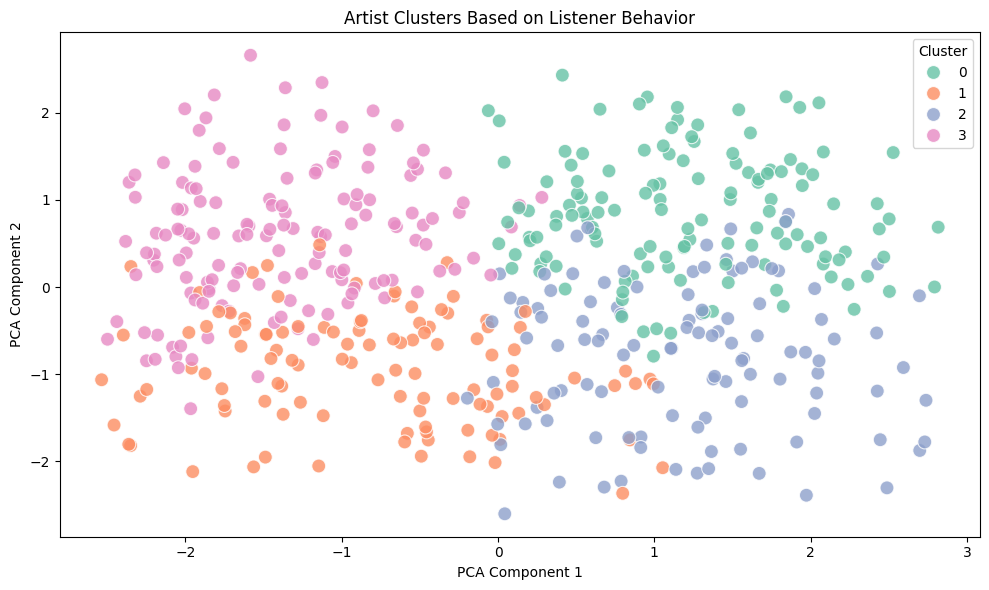

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.8)
plt.title('Artist Clusters Based on Listener Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

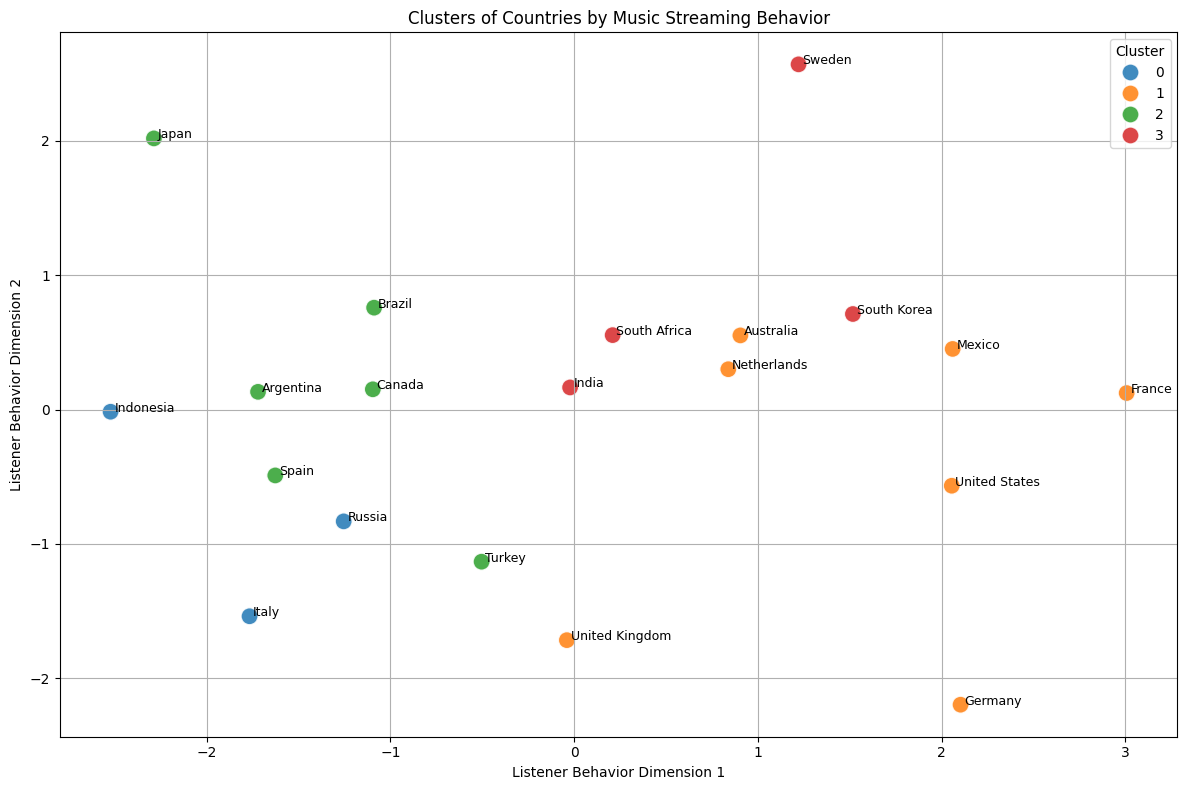

In [ ]:


# Group by country and calculate the average values
country_df = df.groupby('Country')[[
    'Monthly Listeners (Millions)',
    'Total Streams (Millions)',
    'Total Hours Streamed (Millions)',
    'Avg Stream Duration (Min)',
    'Streams Last 30 Days (Millions)',
    'Skip Rate (%)'
]].mean().reset_index()

# Normalize the features
features = country_df.columns[1:]  # exclude country name
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
country_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
country_df['X'] = X_pca[:, 0]
country_df['Y'] = X_pca[:, 1]

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=country_df,
    x='X',
    y='Y',
    hue='Cluster',
    palette='tab10',
    s=150,
    alpha=0.85
)

# Annotate countries for readability
for _, row in country_df.iterrows():
    plt.text(row['X'] + 0.02, row['Y'], row['Country'], fontsize=9)

plt.title('Clusters of Countries by Music Streaming Behavior')
plt.xlabel('Listener Behavior Dimension 1')
plt.ylabel('Listener Behavior Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
